In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

In [2]:
dataset = pd.read_csv("/home/huseinzol05/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
age = dataset.ix[:, 0]
attrition = dataset.ix[:, 1]

dataset.ix[:, 0] = attrition
dataset.ix[:, 1] = age

dataset = dataset.rename(columns = {'Age': 'Attrition', 'Attrition': 'Age'})
dataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Below summary for the whole dataset in 2D space after apply Standard Scaler scikit into the dataset

In [3]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.ix[:, 1:]
Y = dataset.ix[:, :1]

labels = np.unique(Y.values).tolist()

Y.ix[:, 0] = LabelEncoder().fit_transform(Y.ix[:, 0])

for i in xrange(X.shape[1]):
    if str(type(X.ix[0, i])).find('str') > 0:
        X.ix[:, i] = LabelEncoder().fit_transform(X.ix[:, i])

X, _, Y, _ = train_test_split(X, Y, test_size=0.5)

X.ix[:, :] = StandardScaler().fit_transform(X.ix[:, :])

data_visual = TSNE(n_components = 2).fit_transform(X.values)

X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
791,-0.218538,0.600765,1.005195,1.420549,-0.660268,0.067122,2.134083,0.0,0.124664,1.157415,...,-1.553816,0.0,-0.938912,-0.274506,-0.611100,0.341272,0.192651,0.791633,0.683511,0.841424
806,1.603101,0.600765,0.484436,-0.470943,-0.289529,1.034467,-0.958181,0.0,0.155087,-0.668121,...,1.204771,0.0,-0.938912,0.894000,0.998787,0.341272,0.192651,0.510002,0.683511,-1.148980
1139,-0.540004,0.600765,-0.408294,-0.470943,-0.536688,1.034467,1.361017,0.0,0.981570,-0.668121,...,1.204771,0.0,1.428499,-0.664008,0.193843,0.341272,-0.650197,-0.616523,-0.671528,-0.580293
410,-0.754315,0.600765,-1.194393,-0.470943,-0.907427,0.067122,-0.958181,0.0,-0.808299,0.244647,...,0.285242,0.0,-0.938912,-0.014838,-0.611100,0.341272,-0.313058,-0.053261,-0.671528,-0.580293
540,-0.968625,0.600765,-0.358698,-0.470943,-1.031006,-0.900223,-0.958181,0.0,-0.482100,-1.580890,...,1.204771,0.0,-0.938912,-0.144672,0.998787,0.341272,0.024081,0.791633,0.344751,0.841424


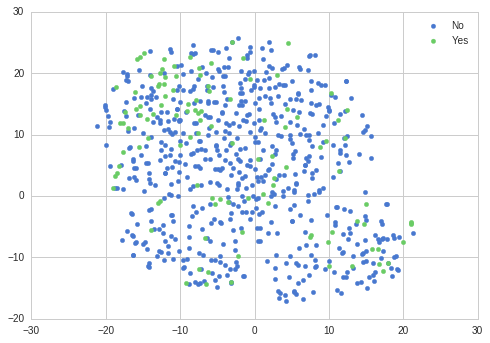

In [4]:
for i, _ in enumerate(np.unique(Y.values)):
    plt.scatter(data_visual[Y.values[:, 0] == i, 0], data_visual[Y.values[:, 0] == i, 1], color = current_palette[i], label = labels[i])
    
plt.legend()
plt.show()

In [5]:
dataset_copy = dataset[['Department', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole']]

dataset_copy.head()

,Department,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,Sales,8,1,6,4
1,Research & Development,10,3,10,7
2,Research & Development,7,3,0,0
3,Research & Development,8,3,8,7
4,Research & Development,6,3,2,2


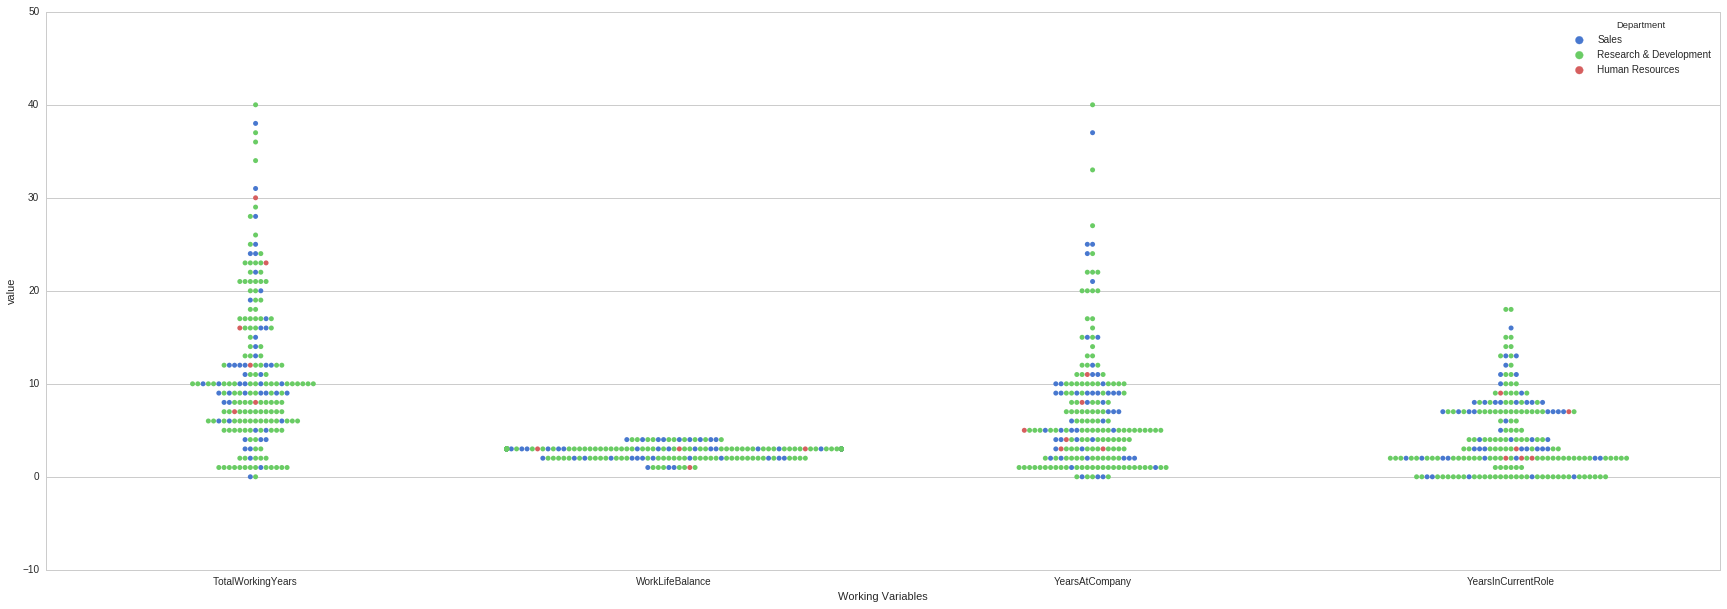

In [9]:
dataset_copy = dataset_copy.ix[:200, :]

plt.figure(figsize=(30,10))

department = pd.melt(dataset_copy, "Department", var_name="Working Variables")

swarm_plot = sns.swarmplot(x="Working Variables", y="value", hue="Department", data=department)
plt.show()

#### There are no Human Resources stay longer in the company like other departments.
#### There are no Human Resources stayed in his position in a long period

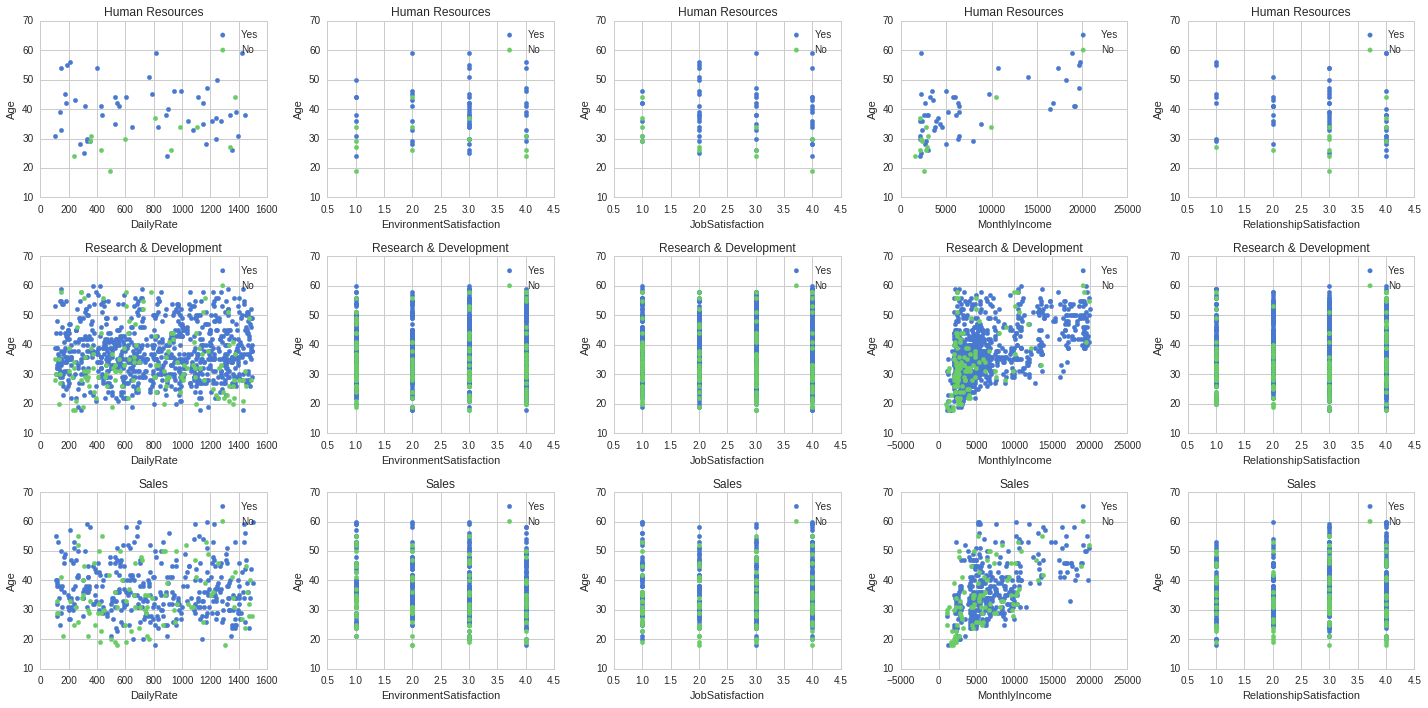

In [10]:
fig = plt.figure(figsize=(20,10))

head_subplot = np.unique(dataset.ix[:, 4].values)

head_int_label = LabelEncoder().fit_transform(dataset['Department'])

unique_head_int_label = np.unique(head_int_label)

rows = ['DailyRate', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'RelationshipSatisfaction']

Y = dataset['Age'].ix[:].values

labelset = LabelEncoder().fit_transform(dataset['Attrition'])

labels = dataset['Attrition'].unique()

num = 1

for i in xrange(len(head_subplot)):
    for k in xrange(len(rows)):
        plt.subplot(len(head_subplot), len(rows), num)

        X = dataset[rows[k]].ix[:].values

        X = X[head_int_label == unique_head_int_label[i]]
        
        Y_in = Y[head_int_label == unique_head_int_label[i]]
        
        labelset_filter = labelset[head_int_label == unique_head_int_label[i]]
        
        for no, text in enumerate(labels):
            plt.scatter(X[labelset_filter == no], Y_in[labelset_filter == no], color = current_palette[no],
                        label = labels[no])
        plt.title(head_subplot[i])
        plt.ylabel('Age')
        plt.xlabel(rows[k])
        plt.legend()
        
        num += 1
        
fig.tight_layout()        
plt.show()     
    

## Yes/No classified by Attrition

#### We need to clean the data before predict the satisfaction

In [56]:
dataset = pd.read_csv("/home/huseinzol05/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

del dataset['Over18']
del dataset['OverTime']

# 17th column and above
X = dataset.ix[:, 17:].values

# change marriage status into int
X[:, 0] = LabelEncoder().fit_transform(X[:, 0])

Y = dataset['JobSatisfaction'].ix[:].values

def one_hot_label(x):
    data = np.zeros((x.shape[0], np.unique(x).shape[0]), dtype = np.float32)
    
    for i in xrange(x.shape[0]):
        data[0, x[i] - 1] = 1.0
        
    return data

Y = one_hot_label(Y)

X = StandardScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

#### Predict Job Satisfaction using Deep Neural Network

In [57]:
import tensorflow as tf

epoch = 100
learning_rate = 0.01
delta_penalty = 0.005
prob_dropout = 0.5

first_layer = 64
second_layer = 128
third_layer = 64

x_placeholder = tf.placeholder('float', [None, X.shape[1]])
y_placeholder = tf.placeholder('float', [None, Y.shape[1]])

weights = {
    'first_weight' : tf.Variable(tf.random_normal([X.shape[1], first_layer])),
    'second_weight' : tf.Variable(tf.random_normal([first_layer, second_layer])),
    'third_weight' : tf.Variable(tf.random_normal([second_layer, third_layer])),
    'fourth_weight' : tf.Variable(tf.random_normal([third_layer, Y.shape[1]])),
}

biases = {
    'first_bias' : tf.Variable(tf.random_normal([first_layer])),
    'second_bias' : tf.Variable(tf.random_normal([second_layer])),
    'third_bias' : tf.Variable(tf.random_normal([third_layer])),
    'fourth_bias' : tf.Variable(tf.random_normal([Y.shape[1]])),
}

first_layer = tf.nn.relu(tf.add(tf.matmul(x_placeholder, weights['first_weight']), biases['first_bias']))
first_layer = tf.nn.dropout(first_layer, prob_dropout)

second_layer = tf.nn.relu(tf.add(tf.matmul(first_layer, weights['second_weight']), biases['second_bias']))
second_layer = tf.nn.dropout(second_layer, prob_dropout)

third_layer = tf.nn.relu(tf.add(tf.matmul(second_layer, weights['third_weight']), biases['third_bias']))
third_layer = tf.nn.dropout(third_layer, prob_dropout)

fourth_layer = tf.add(tf.matmul(third_layer, weights['fourth_weight']), biases['fourth_bias'])

regularizers =  sum(map(lambda x: tf.nn.l2_loss(x), [value for _, value in weights.iteritems()]))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = fourth_layer, labels = y_placeholder)) + (delta_penalty * regularizers)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(fourth_layer, 1), tf.argmax(y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [58]:
import time

sess = tf.InteractiveSession()
    
sess.run(tf.global_variables_initializer())

for i in xrange(epoch):
    
    last_time = time.time()
    
    acc,_, lost = sess.run([accuracy, optimizer, loss], feed_dict = {x_placeholder : x_train, y_placeholder : y_train})
    
    print "epoch: " + str(i + 1) + ", loss: " + str(lost) + ", seconds per epoch: " + str(time.time() - last_time)
    print "total accuracy: " + str(acc)
    

epoch: 1, loss: 51.0341, seconds per epoch: 0.0651400089264
total accuracy: 0.237339
epoch: 2, loss: 53.2222, seconds per epoch: 0.0119919776917
total accuracy: 0.256236
epoch: 3, loss: 57.1534, seconds per epoch: 0.0128529071808
total accuracy: 0.227513
epoch: 4, loss: 50.2132, seconds per epoch: 0.0120048522949
total accuracy: 0.222978
epoch: 5, loss: 45.3913, seconds per epoch: 0.0118670463562
total accuracy: 0.248677
epoch: 6, loss: 65.3626, seconds per epoch: 0.0116839408875
total accuracy: 0.226002
epoch: 7, loss: 50.5345, seconds per epoch: 0.011873960495
total accuracy: 0.250189
epoch: 8, loss: 47.521, seconds per epoch: 0.0120921134949
total accuracy: 0.225246
epoch: 9, loss: 50.8436, seconds per epoch: 0.0115251541138
total accuracy: 0.222222
epoch: 10, loss: 46.8027, seconds per epoch: 0.0118720531464
total accuracy: 0.184429
epoch: 11, loss: 55.6519, seconds per epoch: 0.012176990509
total accuracy: 0.191232
epoch: 12, loss: 51.758, seconds per epoch: 0.0121960639954
total 

# You can try to run more longer to get better accuracy